# House rent Prediction using Regression Algorithms

## Importing the pandas library and 99 acres data set

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
real_estate_data = pd.read_csv("/content/drive/My Drive/My data files/data_set_99acres.csv", header=0)
real_estate_data.drop('Unnamed: 0', axis='columns', inplace=True)
real_estate_data.head(5)
real_estate_data.shape

Mounted at /content/drive


(8058, 3)

## Converting the price column to numerical data

In [ ]:
price_num = []
for price in range(real_estate_data['Price'].count()):
#     print(price)
    try:
        price_num.append(int(real_estate_data['Price'][price]))
    except:
        price_num.append(None)
        
# print(type(price_num[0]))
real_estate_data["Price"] = price_num
real_estate_data.head(5)

,Description,Price,Sq_feet
0,2 BHK Residential Apartment for rent in Gowlid...,18000.0,1400
1,3 BHK Residential Apartment for rent in Gachib...,45000.0,1834
2,1 BHK Residential Apartment for rent in Domalguda,8000.0,330
3,"1 BHK Residential Apartment for rent in Hitex,...",8000.0,510
4,3 BHK Residential Apartment for rent in Whitef...,50000.0,1850


## Checking the numerical columns present in the data set

In [ ]:
real_estate_data.dtypes[real_estate_data.dtypes!='object']

Price      float64
Sq_feet      int64
dtype: object

## Plotting the Numerical Datas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fe8de98d0>,
      dtype=object)

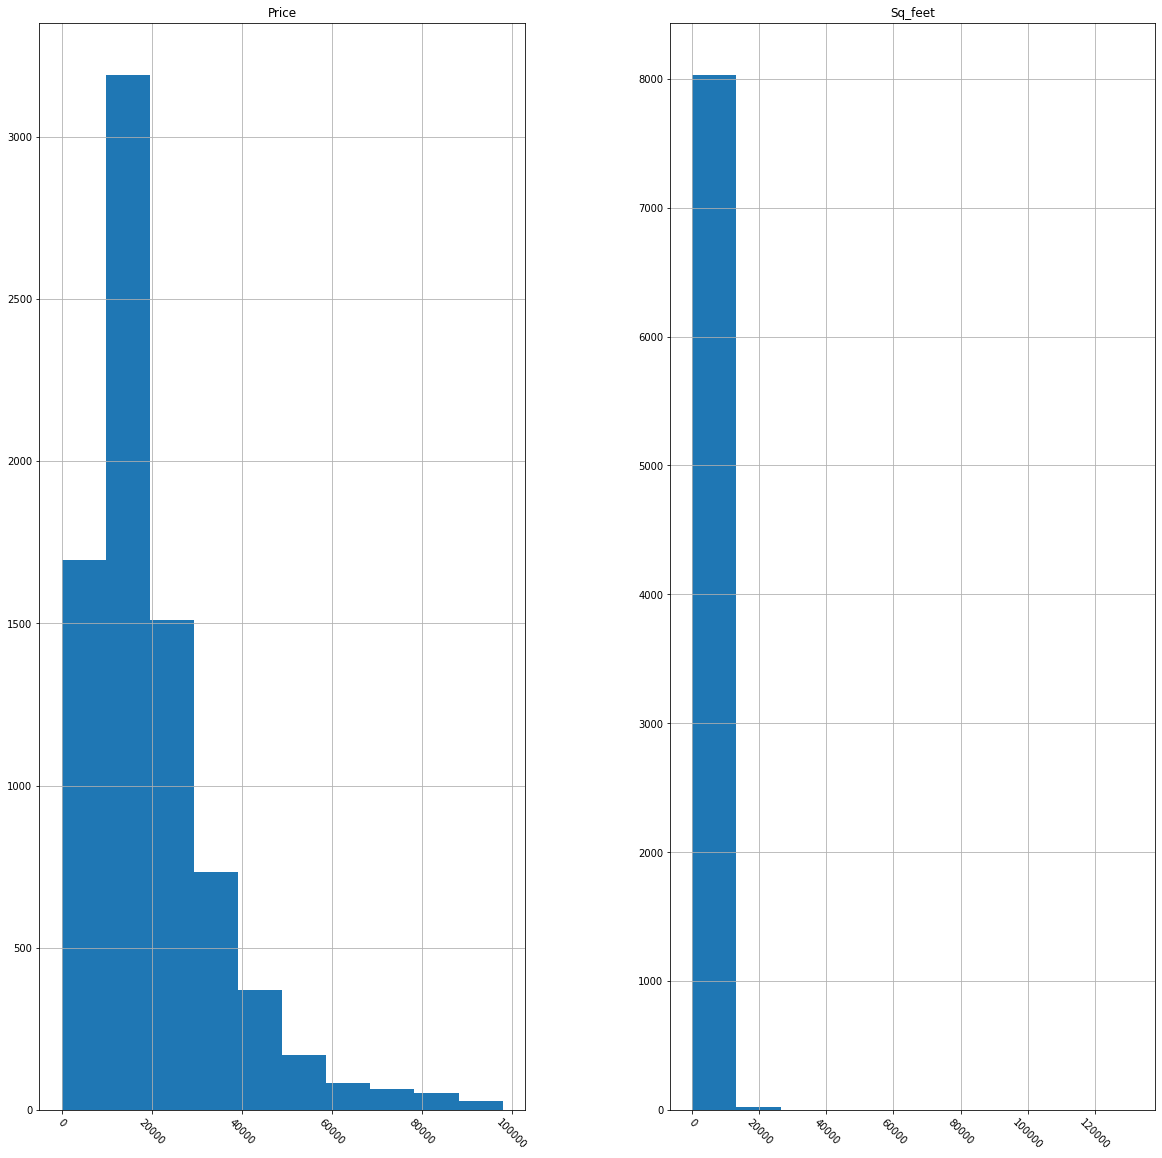

In [ ]:
real_estate_data.hist(figsize=(20,20), xrot=-45)

## Checking the null values in the data

In [ ]:
real_estate_data.isnull().sum()

Description      0
Price          165
Sq_feet          0
dtype: int64

## Dropping the null values from the price column

In [ ]:
real_estate_data.dropna(subset=["Price"], inplace=True)
real_estate_data.shape

(7893, 3)

## Extracting the number of bedrooms the house/appartment have from description and creating a new column with int data type

In [ ]:
values = []
for i in range(real_estate_data['Description'].count()):
    try:
        values.append(int(int(real_estate_data['Description'][i][0])))
    except:
        values.append(None)
        
# print(type(values[0]))
real_estate_data["No_of_beds"] = values
real_estate_data.head(5)

,Description,Price,Sq_feet,No_of_beds
0,2 BHK Residential Apartment for rent in Gowlid...,18000.0,1400,2.0
1,3 BHK Residential Apartment for rent in Gachib...,45000.0,1834,3.0
2,1 BHK Residential Apartment for rent in Domalguda,8000.0,330,1.0
3,"1 BHK Residential Apartment for rent in Hitex,...",8000.0,510,1.0
4,3 BHK Residential Apartment for rent in Whitef...,50000.0,1850,3.0


## Again checking for null values

In [ ]:
real_estate_data.isnull().sum()

Description      0
Price            0
Sq_feet          0
No_of_beds     240
dtype: int64

## Removing the null values present in the flat type column

In [ ]:
real_estate_data.dropna(subset=["No_of_beds"], inplace=True)

## After the preprocessing of data checking for numerical columns in data set for training

In [ ]:
real_estate_data.dtypes[real_estate_data.dtypes!='object']

Price         float64
Sq_feet         int64
No_of_beds    float64
dtype: object

## Making sure we don't have anymore null values.

In [ ]:
real_estate_data.isnull().sum()
print(real_estate_data['Sq_feet'].value_counts())
# real_estate_data = real_estate_data.drop(real_estate_data[real_estate_data['Sq_feet'] < 10].index, inplace = True)

1000    403
1200    382
1100    321
900     241
1800    215
       ... 
2363      1
2335      1
278       1
266       1
8200      1
Name: Sq_feet, Length: 923, dtype: int64


In [ ]:
print(real_estate_data['Sq_feet'].value_counts())

1000    403
1200    382
1100    321
900     241
1800    215
       ... 
2363      1
2335      1
278       1
266       1
8200      1
Name: Sq_feet, Length: 923, dtype: int64


## Creating X, y features and target variables from our data set for training model

In [ ]:
# Data Allocation to x, y
import numpy as np

X = real_estate_data.iloc[:, 2:].values
y = real_estate_data.iloc[:, 1].values
# type(X)
# X = X.reshape(-1,1)
# type(X)
# X.reshape(-1,1)
X.shape

(7653, 2)

## Splitting the data to train test

In [ ]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## Importing necessary modules to build our model

In [ ]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
# from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

## Linear Regressor

In [ ]:
# Linear Reggressor
print(X_train[0])
regressor = LinearRegression()
regressor.fit(X_train, y_train)


[1100.    3.]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

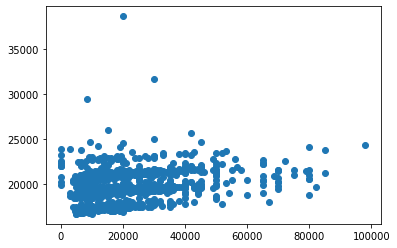

In [ ]:
y_pred = regressor.predict(X_test)
y_pred
plt.scatter(y_test, y_pred)

In [ ]:
regressor.predict([[650, 2]])

array([18803.71723389])

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[7.28887217e-01 1.79486150e+03]
14740.217542005432


## RandomForest Regressor

In [ ]:
random_reg = RandomForestRegressor(n_estimators=4, max_features=2, max_depth=8, min_samples_leaf=2, random_state=2)
random_reg.fit(X_train, y_train)

# plt.scatter(y_train, random_reg.predict(X_train))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=4, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [ ]:
rand_pred = random_reg.predict(X_test)
rand_pred

array([10132.25106686, 13737.28078753, 15821.88266947, ...,
       39230.91297385,  8829.02137618, 19131.96555218])

In [ ]:
random_reg.predict([[2400, 2]])

array([33596.41812865])

In [ ]:
# Random forest Regression
random_accuracy = r2_score(y_test, random_reg.predict(X_test))
print(random_accuracy)

0.5020394176474177


## K Neighbours Regressor

In [ ]:
k_reg = KNeighborsRegressor(n_neighbors=30)
k_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                    weights='uniform')

In [ ]:
k_pred = k_reg.predict(X_test)
k_pred

array([10328.33333333, 14316.66666667, 14260.        , ...,
       33800.        ,  9446.66666667, 19191.66666667])

In [ ]:
k_reg.predict([[1100, 2]])

array([14260.])

## Support Vector Regressor (SVR)

In [ ]:
svr_reg = SVR(kernel='linear')
svr_reg.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_pred = svr_reg.predict(X_test)
svr_pred

array([12301.13093777, 14615.90990009, 15175.05668712, ...,
       25106.7225593 , 10541.97762032, 18224.93912359])

In [ ]:
svr_reg.predict([[2200, 3]])

array([25888.74112201])

## Finding the best accuracy for the above used algorithms using R2 Score Method.

In [ ]:
from sklearn.metrics import r2_score

# Linear Regression
linear_accuracy = r2_score(y_test, k_pred)
print(linear_accuracy)

0.050958846165152005


In [ ]:

# Logistic Regression
linear_accuracy = r2_score(y_test, log_pred)
print(linear_accuracy)

-0.10501126353905699


In [ ]:
# SVR Regression
linear_accuracy = r2_score(y_test, svr_pred)
print(linear_accuracy)

-0.05915259302161724


In [ ]:
# KNN Regression
linear_accuracy = r2_score(y_test, k_pred)
print(linear_accuracy)

0.4661245673911656


In [ ]:

# Random forest Regression
linear_accuracy = r2_score(y_test, random_reg.predict(X_test))
print(linear_accuracy)

0.5020394176474177


In [ ]:
!pip install scikit-learn
from sklearn.metrics import median_absolute_error,mean_absolute_percentage_error
mean_accuracy = median_absolute_error(y_test, rand_pred)
perceent = mean_absolute_percentage_error(y_test, rand_pred)
print(perceent)
print(mean_accuracy)

ImportError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, rand_pred)
mse_test

In [ ]:
k_range = range(1, 1000)
k_scores = []
r_scores = []

for k in k_range:
#     pred = {}
#     knn = KNeighborsRegressor(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     knn_pred = knn.predict(X_test)
#     accuracy = r2_score(y_test, knn_pred)
    r_reg = RandomForestRegressor(n_estimators=k, max_features=2, max_depth=8, min_samples_leaf=2, random_state=7)
    r_reg.fit(X_train, y_train)
    r_pred = r_reg.predict(X_test)
    accuracy = r2_score(y_test, r_pred)
#     pred[k] = accuracy
    r_scores.append(accuracy)

    
    
print(max(r_scores))
print(r_scores.index(max(r_scores)))